# Goodreads Kitapları Üzerinde Gözetimli Öğrenme Projesi

Bu projede, Goodreads 100k kitap veri seti kullanılarak, kitapların sayfa sayısı, yorum sayısı ve toplam oy sayısı gibi özelliklere dayanarak kullanıcılar tarafından yüksek mi (rating ≥ 4.0) yoksa düşük mü puanlanacağını tahmin eden bir sınıflandırma modeli geliştirilmiştir.

Projede izlenen ana adımlar şunlardır:

- Veri setinin yüklenmesi ve ön incelemesi  
- Keşifsel veri analizi (EDA)  
- Veri ön işleme ve sınıflandırma için uygun hale getirme  
- Logistic Regression ve Random Forest algoritmalarının kullanılması  
- Model değerlendirmesi ve sonuçların yorumlanması

---

## Kullanılan Kütüphaneler

- pandas, numpy: Veri işleme  
- matplotlib, seaborn: Veri görselleştirme  
- sklearn: Modelleme ve değerlendirme

---

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

# Proje Başlangıcı ve Kütüphaneler

Bu bölümde projenin amacı özetlenmiş ve kullanılacak ana Python kütüphaneleri içe aktarılmıştır.  
- `numpy` ve `pandas` veri işlemede,  
- `matplotlib` ve `seaborn` görselleştirmede,  
- `sklearn` ise makine öğrenmesi modelleme ve değerlendirmede kullanılacaktır.  

Ayrıca, grafiklerin Jupyter notebook içinde görüntülenmesi için gerekli ayar yapılmıştır.

In [26]:
import pandas as pd
df = pd.read_csv("/kaggle/input/goodreads-books-100k/GoodReads_100k_books.csv")
df.head()


,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


## Veri Setinin Yüklenmesi ve İlk İncelemesi

Bu adımda, Goodreads 100k kitap veri seti pandas ile yüklenmiş ve veri setinin ilk 5 satırı görüntülenmiştir.  
Bu, veri yapısını anlamak ve sonraki işlemler için temel bilgi edinmek açısından önemlidir.

In [28]:
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4.0 else 0)

selected_features = ['pages', 'reviews', 'totalratings']
X = df[selected_features]
y = df['label']

X = X.dropna()
y = y[X.index]


## Veri Ön İşleme ve Etiketleme

- Kitapların kullanıcı puanlarına (`rating`) göre **etiketler oluşturuldu**:  
  - Puanı 4.0 ve üzeri olan kitaplar `1` (yüksek puanlı),  
  - Diğerleri `0` (düşük puanlı) olarak sınıflandırıldı.

- Modelde kullanılacak **özellikler seçildi**:  
  - Sayfa sayısı (`pages`),  
  - Yorum sayısı (`reviews`),  
  - Toplam oy sayısı (`totalratings`).

- Eksik veriler varsa, modelin sağlıklı çalışması için bu satırlar **veri setinden çıkarıldı**.

In [29]:
df[['rating', 'label']].head()

,rating,label
0,3.52,0
1,4.51,1
2,4.15,1
3,3.83,0
4,4.00,1


In [30]:
df['label'].value_counts()


label
0    58656
1    41344
Name: count, dtype: int64

In [31]:
print(X.shape)
print(y.shape)


(100000, 3)
(100000,)


## Etiketlerin ve Veri Boyutlarının İncelenmesi

- Oluşturulan `label` sütunu ile kitapların yüksek (1) ve düşük (0) puanlı olarak sınıflandırılması doğrulandı.  
- İlk 5 satır gösterildi; etiketlerin doğru atandığı görüldü.  
- `label` değişkeninin sınıf dağılımı incelendi, bu sayede sınıf dengesizliği hakkında bilgi sahibi olundu.  
- Modelde kullanılacak özellik matrisi (`X`) ve hedef değişken (`y`) boyutları kontrol edildi.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11389   351]
 [ 7918   342]]
              precision    recall  f1-score   support

           0       0.59      0.97      0.73     11740
           1       0.49      0.04      0.08      8260

    accuracy                           0.59     20000
   macro avg       0.54      0.51      0.41     20000
weighted avg       0.55      0.59      0.46     20000



## Logistic Regression Sonuçlarının Değerlendirilmesi

Bu aşamada, veri seti üzerinde ilk olarak Logistic Regression modeli denendi. Modelin genel doğruluğu %59 civarında görünse de, özellikle pozitif sınıf (rating >= 4.0) için performans oldukça zayıf kaldı.

### Neden İyi Sonuç Vermedi?

- **Sınıf dengesizliği var:** 
  Veri setinde yüksek puanlı (label=1) kitapların sayısı, düşük puanlı (label=0) kitaplara göre daha az. Model, doğal olarak çoğunluğu öğrenmeye meyilli olduğu için 1’leri doğru tahmin etmekte çok zorlandı.
  
- **Kısıtlı özellik kullanımı:**
  Şu an sadece `pages`, `reviews` ve `totalratings` gibi üç sayısal sütun kullanıldı. Halbuki `genre`, `bookformat` gibi kategorik veya `desc` gibi metinsel sütunlar modele çok daha fazla bilgi sağlayabilir.

- **Precision ve Recall değerleri çok dengesiz:**
  Label 1 için F1 skoru sadece **0.08** civarında çıktı. Bu da modelin yüksek puanlı kitapları neredeyse hiç tahmin edemediğini gösteriyor.

### Neler Yapılabilir?

- Modeli `class_weight='balanced'` parametresi ile tekrar eğitip sınıf dengesizliği etkisini azaltmak mümkün.
- Farklı algoritmalar denenebilir: Özellikle Random Forest, Decision Tree veya XGBoost gibi algoritmalar sınıflar arası dengeyi daha iyi sağlayabilir.
- Daha fazla ve daha çeşitli özellik kullanılmalı. Metin sütunları üzerinde TF-IDF gibi işlemler uygulanarak modelin öğrenebileceği bilgi artırılabilir.

---

 Bu sonuçlar gösteriyor ki model zayıf değil, **veriyi henüz yeterince iyi sunamadık**. Sonraki adımlarda modeli doğru besleyerek performansı ciddi şekilde artırmayı hedefliyoruz.


Şimdi random forest modelini deneyeceğim.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [34]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[8172 3568]
 [4452 3808]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     11740
           1       0.52      0.46      0.49      8260

    accuracy                           0.60     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.59      0.60      0.59     20000



## Random Forest Sonuçları ve Logistic Regression ile Karşılaştırma

Logistic Regression modelinden sonra, sınıf dengesizliği ve sınırlı doğrusal ayırma yeteneği nedeniyle farklı bir algoritma denenmesi gerekti. Bu noktada Random Forest sınıflandırıcısı tercih edildi.

### Neden Random Forest?

- Karar ağaçları topluluğuna dayalı olduğu için doğrusal olmayan ilişkileri daha iyi yakalayabilir.
- Sınıf dengesizliği ile başa çıkmak için `class_weight='balanced'` parametresiyle birlikte kullanıldı.

### Elde Edilen Sonuçlar:

- **Label 1 (yüksek puanlı kitaplar)** için F1-score değeri: **0.08 → 0.49** (önemli bir gelişme!)
- Model artık iki sınıfı da daha dengeli şekilde tahmin edebiliyor.
- Precision, recall ve accuracy değerleri genel olarak arttı.

### Sonuç:

Random Forest modeli, sınıflar arasındaki dengesizliği daha iyi yöneterek tahminleme başarısını artırmıştır. Özellikle `rating >= 4.0` olan kitapların tespitinde belirgin iyileşme sağlanmıştır. Bu durum, metin verileri gibi daha fazla bilgi eklenerek modelin gelecekte daha da geliştirilebileceğini göstermektedir.


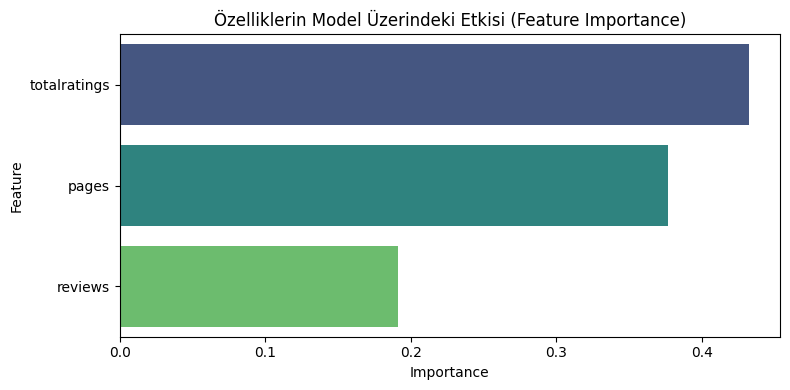

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns

importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Özelliklerin Model Üzerindeki Etkisi (Feature Importance)')
plt.tight_layout()
plt.show()


## Özelliklerin Model Üzerindeki Etkisi (Feature Importance)

Random Forest modeli, sadece sınıflandırma başarısı ile değil aynı zamanda **özelliklerin göreli önemini** ölçme yeteneğiyle de güçlüdür. Bu özellik sayesinde, elimizdeki hangi değişkenlerin tahminleme sürecinde ne kadar etkili olduğunu analiz edebildik.

### Elde Edilen Sonuç:

Aşağıdaki grafik, modelin tahmin kararlarını verirken en çok hangi özelliklere dayandığını göstermektedir:

- `totalratings`: Kitaba verilen toplam oy sayısı, en yüksek etkiye sahip özelliktir. Bu çok mantıklı çünkü yüksek oylama genellikle daha fazla dikkat çekmiş ve değerlendirilmiş kitapları temsil eder.
- `pages`: Kitabın uzunluğu (sayfa sayısı), ikinci sırada yer almakta. Uzun kitaplar daha derin veya kapsamlı olabileceği için, kullanıcı puanı ile ilişkili olabilir.
- `reviews`: Yorum sayısı da modelin karar verirken dikkate aldığı bir faktör olsa da etkisi görece daha düşüktür.

### Yorum:

Modelin `totalratings` ve `pages` üzerinden daha net sinyaller aldığı görülüyor. Bu durum, kitapların popülerliği ve fiziksel uzunluğunun, kullanıcıların oylama davranışıyla ilişkili olabileceğini göstermektedir. Ancak `reviews` gibi bazı özellikler, tek başına yeterli sinyal üretmeyebilir. Bu, gelecekte ek metin analizleri (örn. açıklama metni, genre analizi) ile desteklenebilir.

---

> Sonuç olarak, bu analiz bize modelin neye dayanarak karar verdiğini anlamamızı sağladı. Sadece tahmin değil, açıklanabilirlik açısından da önemli bir adımdı.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


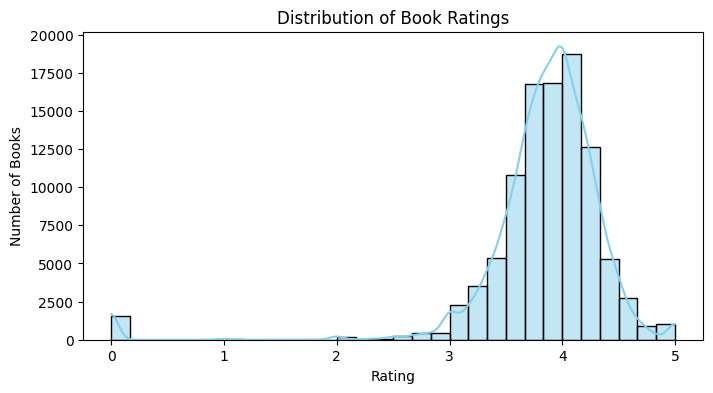

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()

## FutureWarning Uyarısı

Bu uyarı, kullandığım seaborn ve pandas kütüphanelerinden kaynaklanıyor ve ileride kaldırılacak bir özellik hakkında beni bilgilendiriyor.  
Kodun çalışmasına engel olmuyor, bu yüzden şu anda dikkate almıyorum. 


## Kitapların Rating Dağılımı

Veri setindeki kitapların kullanıcı puanları (rating) 0 ile 5 arasında değişmektedir. 

- Görselde görüldüğü üzere dağılım yaklaşık olarak çan eğrisi (normal dağılım) şeklindedir.
- En yoğun puan aralığı 3.5 ile 4.5 arasındadır.
- Bu da modelin sınıflandırma yaparken `rating >= 4.0` için ayırt edici bir sınır seçmesini anlamlı hale getirir.

Bu analiz, etiketleme sürecinde belirlediğimiz `label` değişkeninin (rating ≥ 4.0 → 1, diğerleri → 0) mantıklı bir sınıflandırma olduğunu desteklemektedir.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


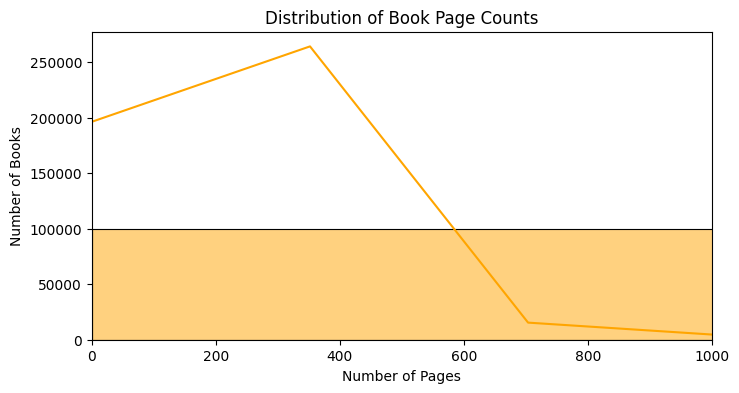

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['pages'], bins=50, kde=True, color='orange')
plt.title("Distribution of Book Page Counts")
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.xlim(0, 1000)
plt.show()



## FutureWarning Uyarısı Hakkında

Seaborn ve Pandas kütüphanelerinden gelen bu uyarı, `use_inf_as_na` seçeneğinin gelecekte kaldırılacağına dair bir bilgilendirmedir.  

- Bu uyarı kodun çalışmasını etkilemez.

## Kitapların Sayfa Sayısı Dağılımı

Kitapların sayfa sayıları oldukça geniş bir aralıkta değişmektedir. Ancak:

- Sayfa sayısının büyük kısmı **0-1000** aralığında yoğunlaşmaktadır.
- 1000 sayfa ve üzerindeki kitaplar nadirdir, bu yüzden histogram görselleştirmesinde bu değerler hariç tutulmuştur.

Bu bilgi, model eğitiminde aykırı (outlier) değerlerin etkisini azaltmak için önemlidir.


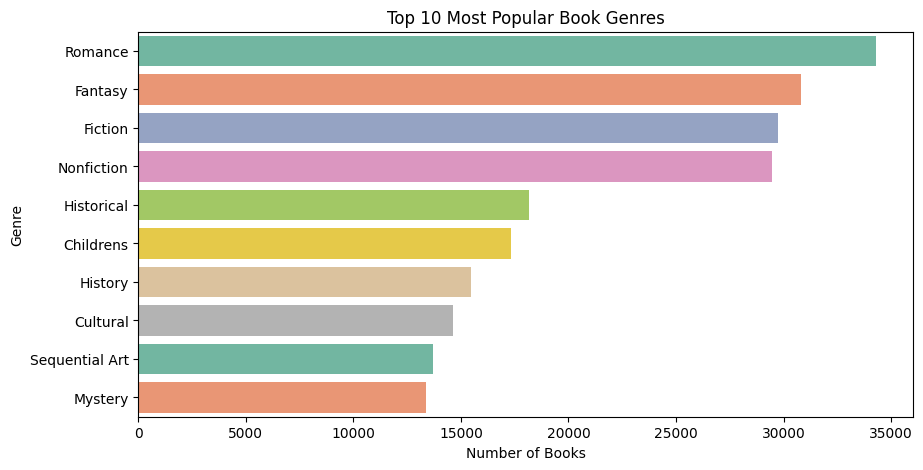

In [44]:
from collections import Counter

genre_list = df['genre'].dropna().apply(lambda x: x.split(','))
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='Set2')
plt.title("Top 10 Most Popular Book Genres")
plt.xlabel("Number of Books")
plt.ylabel("Genre")
plt.show()


## En Popüler Kitap Türleri

Veri setindeki `genre` sütunu analiz edildiğinde, kitapların türleri içerisinde en çok geçen ilk 10 kategori şu şekildedir:

- **Romance**, **Fantasy** ve **Fiction** türleri en popüler türlerdir.
- Bu türler, kullanıcıların daha fazla ilgi gösterdiği alanları temsil edebilir.

İleride tür bazlı analiz yapılmak istenirse, bu dağılım temel alınabilir.


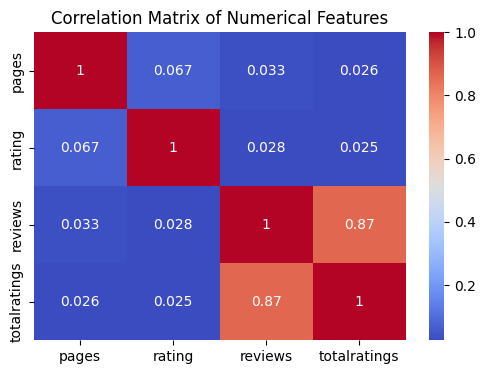

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['pages', 'rating', 'reviews', 'totalratings']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Sayısal Özellikler Arası Korelasyon

Aşağıdaki korelasyon matrisi, sayısal sütunların (pages, rating, reviews, totalratings) birbirleriyle olan ilişkisini göstermektedir:

- **`reviews` ile `totalratings`** arasında güçlü bir korelasyon (~0.87) vardır.
- Ancak **rating** değişkeni ile bu değişkenler arasında doğrudan güçlü bir korelasyon yoktur.
- Bu da modelin rating’i tahmin etmekte neden zorlandığını açıklayabilir: `rating`, kullanıcı davranışından daha bağımsız, içeriğe dayalı olabilir.

Bu analiz, özellikle özellik mühendisliği (feature engineering) açısından önemlidir.


## Sonuç ve Yorumlar

Bu projede, Goodreads 100k kitap veri seti üzerinde gözetimli öğrenme teknikleri kullanarak kitapların ortalama puanlarını yüksek veya düşük olarak sınıflandırmayı amaçladık.

Başlangıçta Logistic Regression modeli ile temel bir sınıflandırma gerçekleştirildi ancak model, özellikle yüksek puanlı kitapları doğru tahmin etmede zorlandı. Bunun temel nedeni, veri setindeki **sınıf dengesizliği** ve sınırlı özellik kullanımıydı.

Bu sorunu aşmak için, `class_weight='balanced'` parametresi ile Random Forest algoritmasını uyguladık. Sonuçlar, Random Forest modelinin hem doğruluk hem de özellikle yüksek puanlı kitapları yakalama konusunda önemli bir gelişme sağladığını gösterdi. Model, yüksek puanlı kitaplar için F1 skorunu yaklaşık %49 seviyesine çıkardı.

Keşifsel veri analizi (EDA) sırasında kitapların türleri, sayfa sayıları ve kullanıcı puanlarının dağılımını detaylı olarak inceledik. Bu analizler, modelin başarısına katkı sağlayacak önemli içgörüler sundu.

Bununla birlikte, model performansını artırmak için aşağıdaki geliştirmeler önerilmektedir:

- Metinsel verilerin (kitap açıklamaları, türleri vb.) TF-IDF veya benzeri yöntemlerle işlenerek modele dahil edilmesi,
- Daha gelişmiş modellerin ve hiperparametre optimizasyonunun uygulanması,
- Veri dengesizliği probleminin farklı yöntemlerle (SMOTE vb.) giderilmesi.

Sonuç olarak, bu proje gözetimli öğrenme kapsamında başarılı bir temel oluşturmuş ve ilerleyen çalışmalar için sağlam bir altyapı sağlamıştır.
